In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1446,1
type,8807,2,Movie,6131
title,8807,8807,Dayveon,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [7]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()

df_new=pd.DataFrame(constraint,index=df['title'])

df_new=df_new.stack()

df_new=pd.DataFrame(df_new)


df_new.reset_index(inplace=True)

df_cast=df_new[['title',0]]

df_cast.columns=['title','cast']


In [8]:
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()

df_new=pd.DataFrame(constraint,index=df['title'])

df_new=df_new.stack()

df_new=pd.DataFrame(df_new)


df_new.reset_index(inplace=True)

df_director=df_new[['title',0]]

df_director.columns=['title','director']

In [9]:
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()

df_new=pd.DataFrame(constraint,index=df['title'])

df_new=df_new.stack()

df_new=pd.DataFrame(df_new)


df_new.reset_index(inplace=True)

df_country=df_new[['title',0]]

df_country.columns=['title','country']

In [10]:
tmp1=df.merge(df_cast,on='title',how='inner')

In [11]:
tmp1.head()

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba


In [12]:
tmp2=tmp1.merge(df_director,on='title',how='inner')

In [13]:
tmp3=tmp2.merge(df_country,on='title',how='inner')

In [14]:
tmp3.head()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in,description,cast_y,director_y,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,nan,South Africa
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,nan,South Africa
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane,nan,South Africa
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba,nan,South Africa


In [15]:
df_merged=tmp3

## Q1. Find Distribution of movies and tv-shows in gitven data set.

In [16]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [17]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

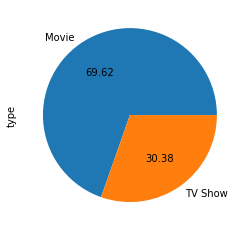

In [18]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f")

### So there is 70% moves and 30% TV Show in given dataset

## Q2. Find list of top 10 artist who have done most number of movies/TV Shows

In [19]:
tmp=df_merged.groupby(['cast_y'])['title'].unique().reset_index()
tmp

,cast_y,title
0,Jr.,"[Guest House, The Get Down]"
1,"""Riley"" Lakdhar Dridi",[An Easy Girl]
2,'Najite Dede,"[Ojos in d' House, It's Her Day]"
3,2 Chainz,[Rapture]
4,2Mex,[This Is the Life]
...,...,...
36435,Şevket Çoruh,[Among Family]
36436,Şinasi Yurtsever,"[Düğün Dernek, Dügün Dernek 2: Sünnet, Hadi İn..."
36437,Şükran Ovalı,[Ekşi Elmalar]
36438,Şükrü Özyıldız,"[Ekşi Elmalar, Winter Sun]"


In [20]:
tmp['count']=[len(i) for i in tmp['title']]

In [21]:
tmp.sort_values(by='count',ascending=False)

,cast_y,title,count
36316,nan,"[Dick Johnson Is Dead, Jailbirds New Orleans, ...",825
2833,Anupam Kher,"[C Kkompany, Kyaa Kool Hai Hum, Kyaa Super Koo...",43
30489,Shah Rukh Khan,"[Anjaam, Chennai Express, Duplicate, Kabhi Alv...",35
16697,Julie Tejwani,"[Chhota Bheem, Mighty Raju, Chhota Bheem - Din...",33
24215,Naseeruddin Shah,"[The Dirty Picture, Ram Prasad Ki Tehrvi, Peep...",32
...,...,...,...
14221,Jamie Lee,[Magnetic],1
14219,Jamie Kenna,[Robin Hood: The Rebellion],1
14218,Jamie Kaler,[Aftermath],1
14217,Jamie Johnston,[Total Frat Movie],1


### So from above result we can say that anupam kher has appeared in 43 movies/tv show. So he is the most popular artist in our dataset.

In [22]:
df_movies=df_merged[df_merged['type']=='Movie']

In [23]:
tmp=df_movies.groupby(['cast_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,cast_y,title,count
25867,nan,"[Dick Johnson Is Dead, Europe's Most Dangerous...",475
2105,Anupam Kher,"[C Kkompany, Kyaa Kool Hai Hum, Kyaa Super Koo...",42
21781,Shah Rukh Khan,"[Anjaam, Chennai Express, Duplicate, Kabhi Alv...",35
17193,Naseeruddin Shah,"[The Dirty Picture, Ram Prasad Ki Tehrvi, Peep...",32
18064,Om Puri,"[Disco Dancer, Bhaji In Problem, Project Marat...",30
638,Akshay Kumar,"[Once Upon a Time in Mumbai Dobaara!, Awara Pa...",30
12031,Julie Tejwani,"[Chhota Bheem - Dinosaur World, Chhota Bheem -...",28
18329,Paresh Rawal,"[Ferrari Ki Sawaari, Awara Paagal Deewana, Phi...",28
1313,Amitabh Bachchan,"[Shootout at Lokhandwala, Department, Wazir, T...",28
20692,Rupa Bhimani,"[Chhota Bheem - Dinosaur World, Chhota Bheem -...",27


### List of top 10 artists worked in most number of movies. 

In [24]:
df_tvshows=df_merged[df_merged['type']=='TV Show']

In [25]:
tmp=df_tvshows.groupby(['cast_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,cast_y,title,count
14805,nan,"[Jailbirds New Orleans, Vendetta: Truth, Lies ...",350
13230,Takahiro Sakurai,"[Record of Ragnarok, JoJo's Bizarre Adventure,...",25
14580,Yuki Kaji,"[The Seven Deadly Sins, Attack on Titan, JoJo'...",19
2874,Daisuke Ono,"[Yowamushi Pedal, Kuroko's Basketball, Attack ...",17
252,Ai Kayano,"[Darwin’s Game, Food Wars!: Shokugeki no Soma,...",17
6804,Junichi Suwabe,"[Yowamushi Pedal, Kuroko's Basketball, Record ...",17
14564,Yuichi Nakamura,"[Yowamushi Pedal, SHAMAN KING, JoJo's Bizarre ...",16
14496,Yoshimasa Hosoya,"[Kuroko's Basketball, Attack on Titan, The Way...",15
6761,Jun Fukuyama,"[Yowamushi Pedal, The Seven Deadly Sins, Durar...",15
3127,David Attenborough,"[Life in Color with David Attenborough, Our Pl...",14


### List of top 10 artists worked in most number of TV Shows. So we can say that Takahiro Sakurai is the most popular artist in TV show category.

## Q-3 Find List of most popular pair of director,cast for movies and tvshow  

In [26]:
tmp=df_merged.groupby(by=['director_y','cast_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,cast_y,title,count
62528,nan,nan,"[Jailbirds New Orleans, Vendetta: Truth, Lies ...",352
61040,nan,Takahiro Sakurai,"[Record of Ragnarok, JoJo's Bizarre Adventure,...",24
35755,Rajiv Chilaka,Julie Tejwani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
35761,Rajiv Chilaka,Rajesh Kava,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
62313,nan,Yuki Kaji,"[The Seven Deadly Sins, Attack on Titan, JoJo'...",18
35762,Rajiv Chilaka,Rupa Bhimani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
35754,Rajiv Chilaka,Jigna Bhardwaj,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
52603,nan,Fortune Feimster,"[Bridgerton - The Afterparty, Champions, Bling...",16
62297,nan,Yuichi Nakamura,"[Yowamushi Pedal, SHAMAN KING, JoJo's Bizarre ...",16
35769,Rajiv Chilaka,Vatsal Dubey,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",16


In [27]:
tmp_df=tmp.sort_values(by='count',ascending=False)
tmp_df[tmp_df['director_y']!='nan'].head(10)

,director_y,cast_y,title,count
35755,Rajiv Chilaka,Julie Tejwani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
35761,Rajiv Chilaka,Rajesh Kava,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
35762,Rajiv Chilaka,Rupa Bhimani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
35754,Rajiv Chilaka,Jigna Bhardwaj,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
35769,Rajiv Chilaka,Vatsal Dubey,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",16
35758,Rajiv Chilaka,Mousam,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
35767,Rajiv Chilaka,Swapnil,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
43526,Suhas Kadav,Saurav Chakraborty,"[Motu Patlu in the Game of Zones, Motu Patlu i...",8
39088,S.S. Rajamouli,Rana Daggubati,"[Baahubali: The Beginning (English Version), B...",7
39089,S.S. Rajamouli,Sathyaraj,"[Baahubali: The Beginning (English Version), B...",7


### List of pairs of director and artist worked together most frequently in Movies/TV Shows

In [28]:
tmp=df_movies.groupby(by=['director_y','cast_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,cast_y,title,count
46813,nan,nan,"[9to5: The Story of a Movement, Sisters on Tra...",54
34026,Rajiv Chilaka,Julie Tejwani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
34032,Rajiv Chilaka,Rajesh Kava,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
34025,Rajiv Chilaka,Jigna Bhardwaj,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
34033,Rajiv Chilaka,Rupa Bhimani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
34040,Rajiv Chilaka,Vatsal Dubey,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",16
34038,Rajiv Chilaka,Swapnil,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
34029,Rajiv Chilaka,Mousam,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
46409,nan,David Spade,"[Bridgerton - The Afterparty, Bling Empire - T...",11
46459,nan,Fortune Feimster,"[Bridgerton - The Afterparty, Bling Empire - T...",11


In [29]:
tmp_df=tmp.sort_values(by='count',ascending=False)
tmp_df[tmp_df['director_y']!='nan'].head(10)

,director_y,cast_y,title,count
34026,Rajiv Chilaka,Julie Tejwani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
34032,Rajiv Chilaka,Rajesh Kava,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",19
34025,Rajiv Chilaka,Jigna Bhardwaj,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
34033,Rajiv Chilaka,Rupa Bhimani,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",18
34040,Rajiv Chilaka,Vatsal Dubey,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",16
34038,Rajiv Chilaka,Swapnil,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
34029,Rajiv Chilaka,Mousam,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",13
41463,Suhas Kadav,Saurav Chakraborty,"[Motu Patlu in the Game of Zones, Motu Patlu i...",8
37266,S.S. Rajamouli,Nassar,"[Baahubali: The Beginning (English Version), B...",7
37267,S.S. Rajamouli,Prabhas,"[Baahubali: The Beginning (English Version), B...",7


### List of pairs of director and artist worked together most frequently in Movies

In [30]:
tmp=df_tvshows.groupby(by=['director_y','cast_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,cast_y,title,count
16093,nan,nan,"[Jailbirds New Orleans, Vendetta: Truth, Lies ...",298
14629,nan,Takahiro Sakurai,"[Record of Ragnarok, JoJo's Bizarre Adventure,...",24
15881,nan,Yuki Kaji,"[The Seven Deadly Sins, Attack on Titan, JoJo'...",18
8714,nan,Junichi Suwabe,"[Yowamushi Pedal, Kuroko's Basketball, Record ...",16
15865,nan,Yuichi Nakamura,"[Yowamushi Pedal, SHAMAN KING, JoJo's Bizarre ...",16
5074,nan,Daisuke Ono,"[Yowamushi Pedal, Kuroko's Basketball, Attack ...",16
8675,nan,Jun Fukuyama,"[Yowamushi Pedal, The Seven Deadly Sins, Durar...",15
15800,nan,Yoshimasa Hosoya,"[Kuroko's Basketball, Attack on Titan, The Way...",15
2652,nan,Ai Kayano,"[Darwin’s Game, Food Wars!: Shokugeki no Soma,...",15
15386,nan,Vincent Tong,"[Polly Pocket, LEGO Jurassic World: Secret Exh...",13


In [31]:
tmp_df=tmp.sort_values(by='count',ascending=False)
tmp_df[tmp_df['director_y']!='nan'].head(10)

,director_y,cast_y,title,count
62,Alastair Fothergill,David Attenborough,"[Frozen Planet, Planet Earth: The Complete Col...",3
2022,Shin Won-ho,Lee Il-hwa,"[Reply 1994, Reply 1997]",2
2106,Stan Lathan,Dave Chappelle,[Dave Chappelle: Equanimity & The Bird Revelat...,2
2028,Shin Won-ho,Sung Dong-il,"[Reply 1994, Reply 1997]",2
1316,Lynn Novick,nan,[Ken Burns Presents: College Behind Bars: A Fi...,2
591,Gautham Vasudev Menon,Anjali,"[Navarasa, Paava Kadhaigal]",2
607,Gautham Vasudev Menon,Prakash Raj,"[Navarasa, Paava Kadhaigal]",2
598,Gautham Vasudev Menon,Gautham Vasudev Menon,"[Navarasa, Paava Kadhaigal]",2
1115,Ken Burns,nan,[Ken Burns: The Roosevelts: An Intimate Histor...,2
0,Abhishek Chaubey,Akansha Ranjan Kapoor,[Ray],1


### List of pairs of director and artist worked together most frequently in TV Shows

## Q-4 List of directors who directed most number of movies/tv Shows

In [32]:
tmp=df_merged.groupby(['director_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,title,count
4978,nan,"[Blood & Water, Jailbirds New Orleans, Kota Fa...",2634
3749,Rajiv Chilaka,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",22
1906,Jan Suter,"[Coco y Raulito: Carrusel de ternura, Luciano ...",21
3800,Raúl Campos,"[Coco y Raulito: Carrusel de ternura, Luciano ...",19
4457,Suhas Kadav,"[Motu Patlu in Dragon's World, Motu Patlu in t...",16
2866,Marcus Raboy,"[Patton Oswalt: I Love Everything, Taylor Toml...",16
1954,Jay Karas,"[The Main Event, Demetri Martin: The Overthink...",15
755,Cathy Garcia-Molina,"[Hello, Love, Goodbye, Unexpectedly Yours, My ...",13
2945,Martin Scorsese,"[Shutter Island, No Direction Home: Bob Dylan,...",12
4941,Youssef Chahine,"[Return of the Prodigal Son, Destiny, The Emig...",12


### List of directors who directed most number of movie/tv show.

In [33]:
tmp=df_movies.groupby(['director_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,title,count
4762,nan,"[9to5: The Story of a Movement, Bridgerton - T...",188
3582,Rajiv Chilaka,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem & ...",22
1817,Jan Suter,"[Coco y Raulito: Carrusel de ternura, Luciano ...",21
3633,Raúl Campos,"[Coco y Raulito: Carrusel de ternura, Luciano ...",19
4261,Suhas Kadav,"[Motu Patlu in Dragon's World, Motu Patlu in t...",16
2739,Marcus Raboy,"[Taylor Tomlinson: Quarter-Life Crisis, Whitne...",15
1862,Jay Karas,"[The Main Event, Demetri Martin: The Overthink...",15
727,Cathy Garcia-Molina,"[Hello, Love, Goodbye, Unexpectedly Yours, My ...",13
4725,Youssef Chahine,"[Return of the Prodigal Son, Destiny, The Emig...",12
2815,Martin Scorsese,"[Shutter Island, No Direction Home: Bob Dylan,...",12


### List of directors who directed most number of movies

In [34]:
tmp=df_tvshows.groupby(['director_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,title,count
299,nan,"[Blood & Water, Jailbirds New Orleans, Kota Fa...",2446
146,Ken Burns,"[Ken Burns: The Civil War, Ken Burns: The Roos...",3
8,Alastair Fothergill,"[Frozen Planet, Planet Earth: The Complete Col...",3
140,Jung-ah Im,"[Men on a Mission, Abnormal Summit]",2
128,Joe Berlinger,"[Metallica: Some Kind of Monster, Crime Scene:...",2
100,Hsu Fu-chun,"[Office Girls, The Rational Life]",2
259,Stan Lathan,[Dave Chappelle: Equanimity & The Bird Revelat...,2
84,Gautham Vasudev Menon,"[Navarasa, Paava Kadhaigal]",2
168,Lynn Novick,[Ken Burns Presents: College Behind Bars: A Fi...,2
251,Shin Won-ho,"[Reply 1994, Reply 1997]",2


### List of directors who directed most number of TV Shows

## Q-5 Distribution of ratings in our dataset.

In [35]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating'>

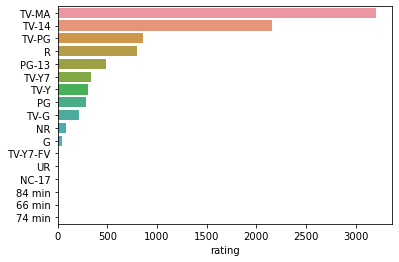

In [36]:
sns.barplot(x=df['rating'].value_counts(),y=df['rating'].value_counts().index,data=df,orient='h')

## Q-6 Distribution of countries in our dataset

In [37]:
df['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [38]:
df['country'].isnull().sum()

831

In [39]:
#df.groupby(by=['country','director'])['title'].count().sort_values(ascending=False)
temp_df=df_merged
temp_df['country_y']=temp_df['country_y'].replace('nan',np.NaN)
temp_df['director_y']=temp_df['director_y'].replace('nan',np.NaN)
#temp_df.groupby(by=['country_y','director_y'])['title'].count().sort_values(ascending=False)
#temp_df.groupby(by=['country_y','director_y'])['title'].count().sort_values(ascending=False)
tmp=temp_df.groupby(by=['country_y','director_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)


,country_y,director_y,title,count
5707,United States,Marcus Raboy,"[Patton Oswalt: I Love Everything, Taylor Toml...",15
5241,United States,Jay Karas,"[The Main Event, Demetri Martin: The Overthink...",15
3093,Philippines,Cathy Garcia-Molina,"[Hello, Love, Goodbye, Unexpectedly Yours, My ...",13
2830,Mexico,Jan Suter,"[Coco y Raulito: Carrusel de ternura, Carlos B...",12
5753,United States,Martin Scorsese,"[Shutter Island, No Direction Home: Bob Dylan,...",12
983,Egypt,Youssef Chahine,"[Return of the Prodigal Son, Destiny, The Emig...",12
5240,United States,Jay Chapman,"[D.L. Hughley: Contrarian, Moshe Kasher: Live ...",12
6394,United States,Steven Spielberg,"[Jaws, Catch Me If You Can, The BFG, Indiana J...",11
4909,United States,Don Michael Paul,"[Company of Heroes, Sniper: Legacy, Sniper: Gh...",10
2868,Mexico,Raúl Campos,"[Coco y Raulito: Carrusel de ternura, Carlos B...",10


### List of country wise most famous directors

In [40]:
temp_df=df_merged
temp_df['country_y']=temp_df['country_y'].replace('nan',np.NaN)
#temp_df['director_y']=temp_df['director_y'].replace('nan',np.NaN)
#temp_df.groupby(by=['country_y','director_y'])['title'].count().sort_values(ascending=False)
#temp_df.groupby(by=['country_y','director_y'])['title'].count().sort_values(ascending=False)
tmp=temp_df.groupby(by=['country_y','rating'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,country_y,rating,title,count
495,United States,TV-MA,"[Sankofa, Dear White People, Paradise Hills, T...",1100
492,United States,R,"[Safe House, Training Day, Kate, In the Cut, B...",660
196,India,TV-14,"[Jeans, Angamaly Diaries, Anjaam, Gurgaon, Shi...",572
493,United States,TV-14,"[Lucifer, The Guns of Navarone, Manifest, The ...",497
491,United States,PG-13,"[Dick Johnson Is Dead, The Starling, Grown Ups...",433
496,United States,TV-PG,"[Nailed It, Saved by the Bell, Major Dad, Spar...",304
198,India,TV-MA,"[Kota Factory, Kyaa Kool Hai Hum, Kyaa Kool Ha...",266
478,United Kingdom,TV-MA,"[Sankofa, Sex Education, Jack Whitehall: Trave...",251
490,United States,PG,"[Jaws, Jaws 2, Jaws 3, Show Dogs, A Cinderella...",243
423,Spain,TV-MA,"[Paradise Hills, La casa de papel, Valeria, Ta...",170


### List containing country wise most number of Movies/TVshows rating

## Q-7 Distribution of release_year

In [41]:
df['release_year'].value_counts().head(15)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

<AxesSubplot:xlabel='count', ylabel='release_year'>

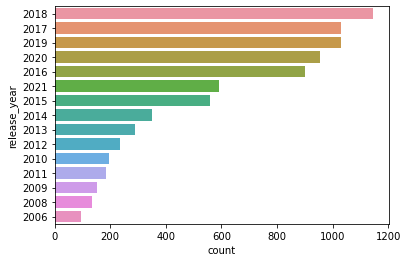

In [42]:
sns.countplot(y='release_year',data=df,order=df.release_year.value_counts().index[0:15])

### Count plot which shows the number of releases per year

<AxesSubplot:xlabel='count', ylabel='release_year'>

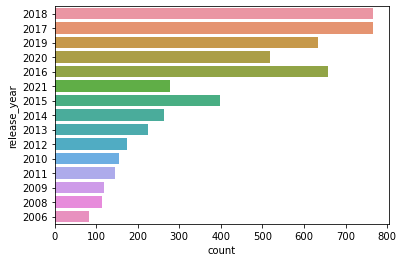

In [43]:
df_movies_original=df[df['type']=='Movie']
sns.countplot(y='release_year',data=df_movies_original,order=df.release_year.value_counts().index[0:15])

### Count plot which shows the number of movie releases per year

<AxesSubplot:xlabel='count', ylabel='release_year'>

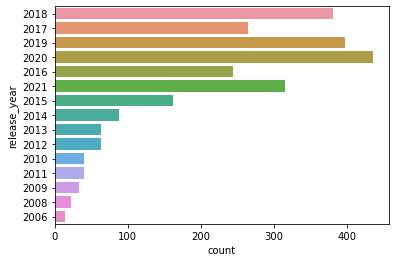

In [44]:
df_tvshows_original=df[df['type']=='TV Show']
sns.countplot(y='release_year',data=df_tvshows_original,order=df.release_year.value_counts().index[0:15])

### Count plot which shows the number of TV Shows releases per year

In [45]:
temp_df=df_merged
temp_df['director_y']=temp_df['director_y'].replace('nan',np.NaN)
tmp=temp_df.groupby(by=['director_y','release_year'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,director_y,release_year,title,count
4982,Raúl Campos,2018,"[Coco y Raulito: Carrusel de ternura, Luciano ...",12
2456,Jan Suter,2018,"[Coco y Raulito: Carrusel de ternura, Luciano ...",12
3711,Marcus Raboy,2017,"[Judd Apatow: The Return, DeRay Davis: How to ...",6
4898,Rajiv Chilaka,2013,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem An...",6
4967,Rathindran R Prasad,2021,"[Boomika, Boomika (Hindi), Boomika (Malayalam)...",5
2455,Jan Suter,2017,"[Mea Culpa, El Especial de Alex Fernández, el ...",5
2223,Hidenori Inoue,2017,[Seven Souls in the Skull Castle: Season Moon ...,5
5907,Suhas Kadav,2018,"[Motu Patlu Dino Invasion, Motu Patlu in the C...",4
2515,Jay Chapman,2017,"[Todd Barry: Spicy Honey, Craig Ferguson: Tick...",4
1625,Edward Cotterill,2017,"[Amelia: A Tale of Two Sisters, Jackie: A Tale...",4


### List of directors who directed most number of content in single year

In [46]:
temp_df=df_merged
temp_df['cast_y']=temp_df['cast_y'].replace('nan',np.NaN)
tmp=temp_df.groupby(by=['cast_y','release_year'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,cast_y,release_year,title,count
17038,Fortune Feimster,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",11
12803,David Spade,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",10
31978,London Hughes,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",10
55393,Vincent Tong,2019,"[LEGO Ninjago: Masters of Spinjitzu, Super Mon...",8
3294,Andrea Libman,2018,"[My Little Pony: Friendship Is Magic, Hatchima...",8
53090,Tiffany Haddish,2019,"[The Last O.G., Tiffany Haddish: Black Mitzvah...",7
43209,Radhika Apte,2018,"[The Wedding Guest, Bombairiya, Baazaar, Andha...",7
36700,Michela Luci,2019,"[Abby Hatcher, True: Winter Wishes, True: Grab...",7
1736,Alessandro Juliani,2019,"[Chip and Potato, Super Monsters Save Christma...",7
27881,Kathleen Barr,2019,"[Super Monsters Save Christmas, Llama Llama, T...",7


### List of artist who worked on most number of movies/tvshows in a single year

In [47]:
temp_df=df_movies
temp_df['cast_y']=temp_df['cast_y'].replace('nan',np.NaN)
tmp=temp_df.groupby(by=['cast_y','release_year'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

<ipython-input-47-91d4dfcbacd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cast_y']=temp_df['cast_y'].replace('nan',np.NaN)


,cast_y,release_year,title,count
12169,Fortune Feimster,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",10
22330,London Hughes,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",9
9098,David Spade,2021,"[Bridgerton - The Afterparty, Bling Empire - T...",9
32458,Rupa Bhimani,2018,"[Antariksha Ke Rakhwale, Chhota Bheem Aur Kaal...",6
33247,Samuel West,2013,"[Secrets of Althorp - The Spencers, Secrets of...",6
3287,Anupam Kher,2013,"[Chashme Baddoor, Special 26, Gori Tere Pyaar ...",6
38647,Vatsal Dubey,2013,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem An...",6
5136,Blossom Chukwujekwu,2020,"[Omo Ghetto: the Saga, Unroyal, Quam's Money, ...",6
8062,Craig Sechler,2017,"[NOVA: Bird Brain, NOVA: Day the Dinosaurs Die...",6
18946,Julie Tejwani,2013,"[Chhota Bheem - Neeli Pahaadi, Chhota Bheem An...",6


### List of artist who worked on most number of movies in a single year

## Q-8 Analysis of Duration

In [48]:
#df['duration']=df['duration'].fillna('0')
df_movies_original['duration']=df_movies_original['duration'].apply(lambda x: x.replace(' min','') if 'min' in str(x) else x)

<ipython-input-48-7954c0536b77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_original['duration']=df_movies_original['duration'].apply(lambda x: x.replace(' min','') if 'min' in str(x) else x)


In [49]:
df_movies_original['duration']=df_movies_original['duration'].apply(pd.to_numeric)

<ipython-input-49-09e22aaaa6b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_original['duration']=df_movies_original['duration'].apply(pd.to_numeric)


In [50]:
df_movies_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6131 non-null   object 
 1   type          6131 non-null   object 
 2   title         6131 non-null   object 
 3   director      5943 non-null   object 
 4   cast          5656 non-null   object 
 5   country       5691 non-null   object 
 6   date_added    6131 non-null   object 
 7   release_year  6131 non-null   int64  
 8   rating        6129 non-null   object 
 9   duration      6128 non-null   float64
 10  listed_in     6131 non-null   object 
 11  description   6131 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 751.7+ KB


In [51]:
df_movies_original.describe()

,release_year,duration
count,6131.000000,6128.000000
mean,2013.121514,99.577187
std,9.678169,28.290593
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


### Stastical measures of duration of movies

In [52]:
df_movies_original.groupby('country')['duration'].mean()

country
, France, Algeria                                      103.000000
Argentina                                               85.789474
Argentina, Brazil, France, Poland, Germany, Denmark     96.000000
Argentina, Chile                                        95.000000
Argentina, Chile, Peru                                 100.000000
                                                          ...    
Venezuela                                              119.000000
Venezuela, Colombia                                     82.000000
Vietnam                                                106.285714
West Germany                                           150.000000
Zimbabwe                                               100.000000
Name: duration, Length: 651, dtype: float64

In [53]:
tmp=df.merge(df_country,on='title',how='inner')
tmp=tmp[tmp['type']=='Movie']

In [54]:
tmp['duration']=tmp['duration'].apply(lambda x: x.replace(' min','') if 'min' in str(x) else x)
tmp['duration']=tmp['duration'].apply(pd.to_numeric)

In [55]:
tmp.groupby('country_y')['duration'].mean().sort_values(ascending=False)

country_y
Liechtenstein      200.000000
Montenegro         157.000000
Soviet Union       156.666667
Bahamas            145.000000
Cameroon           143.000000
                      ...    
Guatemala           68.000000
Uganda              68.000000
Kazakhstan          67.000000
United Kingdom,     62.000000
Syria               52.000000
Name: duration, Length: 123, dtype: float64

### Country wise Average length of movies 

In [56]:
tmp=df.merge(df_country,on='title',how='inner')
tmp=tmp[tmp['type']=='TV Show']
tmp['duration']=tmp['duration'].apply(lambda x: x.replace(' Season','') if 'Season' in str(x) else x)
tmp['duration']=tmp['duration'].apply(lambda x: x.replace('s','') if 's' in str(x) else x)
tmp['duration']=tmp['duration'].apply(pd.to_numeric)

In [57]:
tmp.groupby('country_y')['duration'].mean().sort_values(ascending=False)

country_y
Malta                   4.000000
Hungary                 3.000000
United Arab Emirates    3.000000
Canada                  2.817460
Ireland                 2.571429
                          ...   
Cyprus                  1.000000
Cuba                    1.000000
Azerbaijan              1.000000
Austria                 1.000000
Lebanon                 1.000000
Name: duration, Length: 67, dtype: float64

### country wise average length of tv shows

In [58]:
df_tvshows_original['duration']=df_tvshows_original['duration'].apply(lambda x: x.replace(' Season','') if 'Season' in str(x) else x)
df_tvshows_original['duration']=df_tvshows_original['duration'].apply(lambda x: x.replace('s','') if 's' in str(x) else x)
df_tvshows_original['duration']=df_tvshows_original['duration'].apply(pd.to_numeric)
df_tvshows_original.describe()

<ipython-input-58-3fd3e22f58e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows_original['duration']=df_tvshows_original['duration'].apply(lambda x: x.replace(' Season','') if 'Season' in str(x) else x)
<ipython-input-58-3fd3e22f58e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows_original['duration']=df_tvshows_original['duration'].apply(lambda x: x.replace('s','') if 's' in str(x) else x)
<ipython-input-58-3fd3e22f58e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a 

,release_year,duration
count,2676.000000,2676.000000
mean,2016.605755,1.764948
std,5.740138,1.582752
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


### Statistical anaalysis of duration of tv shows

In [59]:
df_tvshows_original['duration'].value_counts().tail(10)

6     33
7     23
8     17
9      9
10     7
13     3
12     2
11     2
15     2
17     1
Name: duration, dtype: int64

### Tv shows with most number of seasons and their counts

In [60]:
long_tv_shows=df_tvshows_original[df_tvshows_original['duration']>10]
long_tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1354,s1355,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"February 1, 2021",2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4220,s4221,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,"January 1, 2019",2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
4964,s4965,TV Show,Trailer Park Boys,NaN,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,"March 30, 2018",2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...
5412,s5413,TV Show,Criminal Minds,NaN,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada","June 30, 2017",2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...
6456,s6457,TV Show,Cheers,NaN,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,"July 1, 2017",1992,TV-PG,11,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o..."
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [61]:
long_tv_shows.rating.value_counts()

TV-14    5
TV-MA    2
TV-PG    2
NR       1
Name: rating, dtype: int64

## Q-9 Analysing release month and year

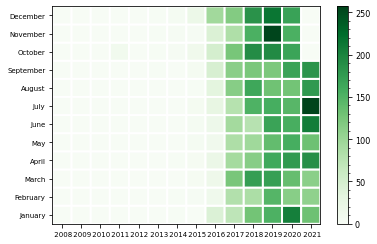

<Figure size 720x288 with 0 Axes>

<Figure size 432x720 with 0 Axes>

In [62]:
nf_date=df[['date_added']].dropna()
nf_date['year']=nf_date['date_added'].apply(lambda x: x.split(',')[-1])
nf_date['month']=nf_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
months=['January','February','March','April','May','June','July','August','September','October','November','December']
my_df=nf_date.groupby('year')['month'].value_counts().unstack().fillna(0)[months].T
#plt.figure(figsize(10,7),dpi=200)
#figsize(10,7)
plt.pcolor(my_df,cmap='Greens',edgecolor='white',linewidth=2)
plt.xticks(np.arange(0.5,len(my_df.columns),1),my_df.columns,fontsize=7)
plt.yticks(np.arange(0.5,len(my_df.index),1),my_df.index,fontsize=7)

cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
#plt.plot(figsize(10,7))
plt.figure().set_figwidth(10)
plt.figure().set_figheight(10)
plt.show()

### Heat map to represent number of release by netflix for particular month and year

## Q-10 Analysis of Genere

In [63]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

df_new=pd.DataFrame(constraint,index=df['title'])

df_new=df_new.stack()

df_new=pd.DataFrame(df_new)


df_new.reset_index(inplace=True)

df_genere=df_new[['title',0]]

df_genere.columns=['title','listed_in']

In [64]:
tmp_genere=df.merge(df_genere,how='inner',on='title')
tmp=tmp_genere.groupby(by=['listed_in_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,listed_in_y,title,count
16,International Movies,"[Sankofa, Je Suis Karl, Europe's Most Dangerou...",2752
12,Dramas,"[Sankofa, The Starling, Je Suis Karl, Ankahi K...",2427
7,Comedies,"[The Starling, Confessions of an Invisible Gir...",1674
17,International TV Shows,"[Blood & Water, Ganglands, Kota Factory, Vende...",1351
10,Documentaries,"[Dick Johnson Is Dead, Europe's Most Dangerous...",869
0,Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja...",859
34,TV Dramas,"[Blood & Water, Midnight Mass, Dear White Peop...",763
15,Independent Movies,"[Sankofa, Ankahi Kahaniya, Dhanak, Wind River,...",756
4,Children & Family Movies,"[My Little Pony: A New Generation, Confessions...",641
24,Romantic Movies,"[Jeans, JJ+E, Afterlife of the Party, Bright S...",616


### Counts of content listed in each category. We can see that most content fall in International movies and dramas category.

In [65]:
tmp_genere=df_movies_original.merge(df_genere,how='inner',on='title')
tmp=tmp_genere.groupby(by=['listed_in_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,listed_in_y,title,count
11,International Movies,"[Sankofa, Je Suis Karl, Europe's Most Dangerou...",2752
7,Dramas,"[Sankofa, The Starling, Je Suis Karl, Ankahi K...",2427
4,Comedies,"[The Starling, Confessions of an Invisible Gir...",1674
6,Documentaries,"[Dick Johnson Is Dead, Europe's Most Dangerous...",869
0,Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja...",859
10,Independent Movies,"[Sankofa, Ankahi Kahaniya, Dhanak, Wind River,...",756
2,Children & Family Movies,"[My Little Pony: A New Generation, Confessions...",641
15,Romantic Movies,"[Jeans, JJ+E, Afterlife of the Party, Bright S...",616
19,Thrillers,"[Intrusion, Paranoia, The Father Who Moves Mou...",577
14,Music & Musicals,"[Minsara Kanavu, If I Leave Here Tomorrow: A F...",375


### Count of movies listed in each category

In [66]:
tmp_genere=df_tvshows_original.merge(df_genere,how='inner',on='title')
tmp=tmp_genere.groupby(by=['listed_in_y'])['title'].unique().reset_index()
tmp['count']=[len(i) for i in tmp['title']]
tmp.sort_values(by='count',ascending=False).head(11)

,listed_in_y,title,count
5,International TV Shows,"[Blood & Water, Ganglands, Kota Factory, Vende...",1351
15,TV Dramas,"[Blood & Water, Midnight Mass, Dear White Peop...",763
14,TV Comedies,"[Kota Factory, Dear White People, Chicago Part...",581
3,Crime TV Shows,"[Ganglands, Vendetta: Truth, Lies and The Mafi...",470
6,Kids' TV,"[Tayo and Little Wizards, Angry Birds, Chhota ...",451
4,Docuseries,"[Jailbirds New Orleans, Vendetta: Truth, Lies ...",395
9,Romantic TV Shows,"[Kota Factory, The Smart Money Woman, Too Hot ...",370
8,Reality TV,"[Jailbirds New Orleans, The Great British Baki...",255
1,British TV Shows,"[The Great British Baking Show, Crime Stories:...",253
0,Anime Series,"[Yowamushi Pedal, Pokémon Master Journeys: The...",176


### Count of TV shows listed in each category